<a href="https://colab.research.google.com/github/nguyenbinh0807/predict_heart_dicrease/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# heart disease data dictionary

Từ điển dữ liệu mô tả dữ liệu bạn đang xử lý. Không phải tất cả các bộ dữ liệu đều đi kèm với chúng, vì vậy đây là nơi bạn có thể phải thực hiện nghiên cứu của mình hoặc hỏi một chuyên gia về chủ đề (người biết về dữ liệu) để biết thêm.

age - tuổi tính theo năm

sex - (1 = nam; 0 = nữ)

cp - loại đau ngực

0: Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim

1: Đau thắt ngực không điển hình: đau ngực không liên quan đến tim

2: Đau không do đau thắt ngực: thường là co thắt thực quản (không liên quan đến tim)

3: Không có triệu chứng: đau ngực không có dấu hiệu của bệnh
trestbps - huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện) bất kỳ điều gì trên 130-140 thường là nguyên nhân đáng lo ngại

chol - cholestoral trong huyết thanh tính bằng mg / dl
huyết thanh = LDL + HDL + .2 * chất béo trung tính trên 200 là nguyên nhân đáng lo ngại

fbs - (đường huyết lúc đói> 120 mg / dl) (1 = true; 0 = false) '> 126' mg / dL báo hiệu bệnh tiểu đường

restecg - kết quả điện tâm đồ lúc nghỉ 0: Không có gì cần lưu ý 1: Bất thường về sóng ST-T có thể từ các triệu chứng nhẹ đến các vấn đề nghiêm trọng báo hiệu nhịp tim không bình thường 2: Có thể hoặc xác định phì đại thất trái Phì đại buồng bơm chính của tim

thalach - nhịp tim tối đa đạt được

exang - đau thắt ngực do tập thể dục (1 = có; 0 = không)

oldpeak - ST trầm cảm gây ra do tập thể dục liên quan đến nghỉ ngơi nhìn căng thẳng của tim khi tập thể dục, tim không khỏe mạnh sẽ căng thẳng hơn
slope - độ dốc của bài tập cao điểm Đoạn ST 0: Lộn ngược: nhịp tim tốt hơn khi tập thể dục (không phổ biến) 1: Lướt ván: thay đổi tối thiểu (tim khỏe mạnh điển hình) 2: Downslopins: dấu hiệu của tim không khỏe

ca - số lượng các mạch chính (0-3) được tô màu bởi mạch màu bột màu có nghĩa là bác sĩ có thể nhìn thấy máu đi qua càng nhiều máu di chuyển càng tốt (không có cục máu đông)

thal - kết quả căng thẳng thalium 1,3: bình thường 6: khuyết tật cố định: từng là khuyết tật nhưng bây giờ ổn 7: khuyết tật có thể đảo ngược: không có chuyển động máu thích hợp khi vận động

target - có bệnh hay không (1 = có, 0 = không) (= thuộc tính dự đoán)

Bệnh tim mô tả một loạt các tình trạng ảnh hưởng đến tim của bạn. Ngày nay, các bệnh tim mạch là nguyên nhân gây tử vong hàng đầu trên toàn thế giới với 17,9 triệu ca tử vong hàng năm, theo báo cáo của Tổ chức Y tế Thế giới [1]. Các hoạt động không lành mạnh khác nhau là nguyên nhân làm tăng nguy cơ mắc bệnh tim như cholesterol cao, béo phì, tăng nồng độ triglycerid, tăng huyết áp,… [1]. Có những dấu hiệu nhất định mà Hiệp hội Tim mạch Hoa Kỳ [2] liệt kê như những người gặp vấn đề về giấc ngủ, nhịp tim tăng và giảm nhất định (nhịp tim không đều), sưng chân, và trong một số trường hợp, tăng cân diễn ra khá nhanh; nó có thể là 1-2 kg mỗi ngày [3]. Tất cả các triệu chứng này giống với các bệnh khác nhau cũng giống như nó xảy ra ở những người già, vì vậy việc chẩn đoán chính xác trở thành một nhiệm vụ khó khăn, dẫn đến tử vong trong tương lai gần.

Bộ dữ liệu được sử dụng cho mục đích nghiên cứu này là Bộ dữ liệu Y tế Công cộng và nó có niên đại từ năm 1988 và bao gồm bốn cơ sở dữ liệu: Cleveland, Hungary, Thụy Sĩ và Long Beach V. 

Nó chứa 76 thuộc tính, bao gồm cả thuộc tính dự đoán, nhưng tất cả các thử nghiệm đã được công bố đề cập đến việc sử dụng một tập hợp con gồm 14 thử nghiệm trong số đó. 

Trường "target" đề cập đến sự hiện diện của bệnh tim ở bệnh nhân. Nó có giá trị nguyên 0 = không có bệnh và 1 = bệnh. 

Bốn hàng đầu tiên và tất cả các tính năng của tập dữ liệu được hiển thị trong Bảng 1 mà không cần xử lý trước. Bây giờ các thuộc tính được sử dụng trong mục đích nghiên cứu này được mô tả như sau và chúng được sử dụng hoặc giống với những gì:

In [ ]:
#import module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
path='/content/gdrive/MyDrive/heart-disease/heart-disease.csv'
data=pd.read_csv(path)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
num_data=[]
cat_data=[]
def col_data(data, cat_data, num_data):
  for col in data.columns:
    if len(data[col].unique()) <= 5:
      cat_data.append(col)
    else:
      num_data.append(col)
col_data(data, cat_data, num_data)

In [ ]:
sns.set_style('darkgrid')

In [ ]:
def count_plot(data, cat_data):
  fig, ax = plt.subplots(3,3,figsize=(25,13))
  ax = ax.flatten()
  fig.suptitle('Count Plot', fontsize=16, y=0.92)

  for index, col in enumerate(cat_data):
    graph=sns.countplot(x=data[col], ax=ax[index])
    

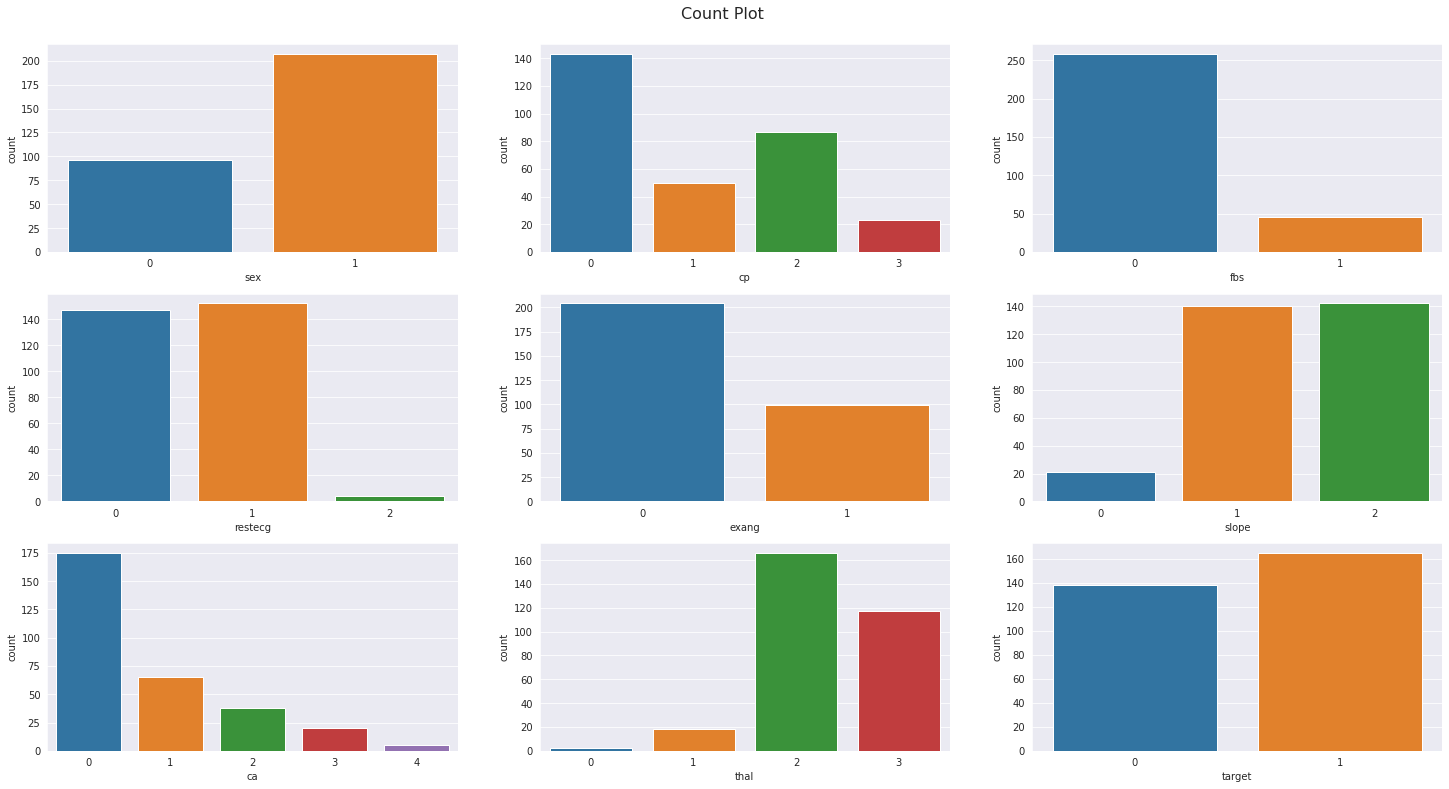

In [ ]:
count_plot(data, cat_data)

In [ ]:
def count_hue_sex(data, cat_data):
  fig, ax = plt.subplots(4,2,figsize=(25,18))
  ax = ax.flatten()
  cat_data_del_sex=np.delete(cat_data, 0)
  fig.suptitle('Count Plot hue sex', fontsize=16, y=0.92)

  for index, col in enumerate(cat_data_del_sex):
    graph=sns.countplot(x=data[col], ax=ax[index], hue=data[cat_data[0]])

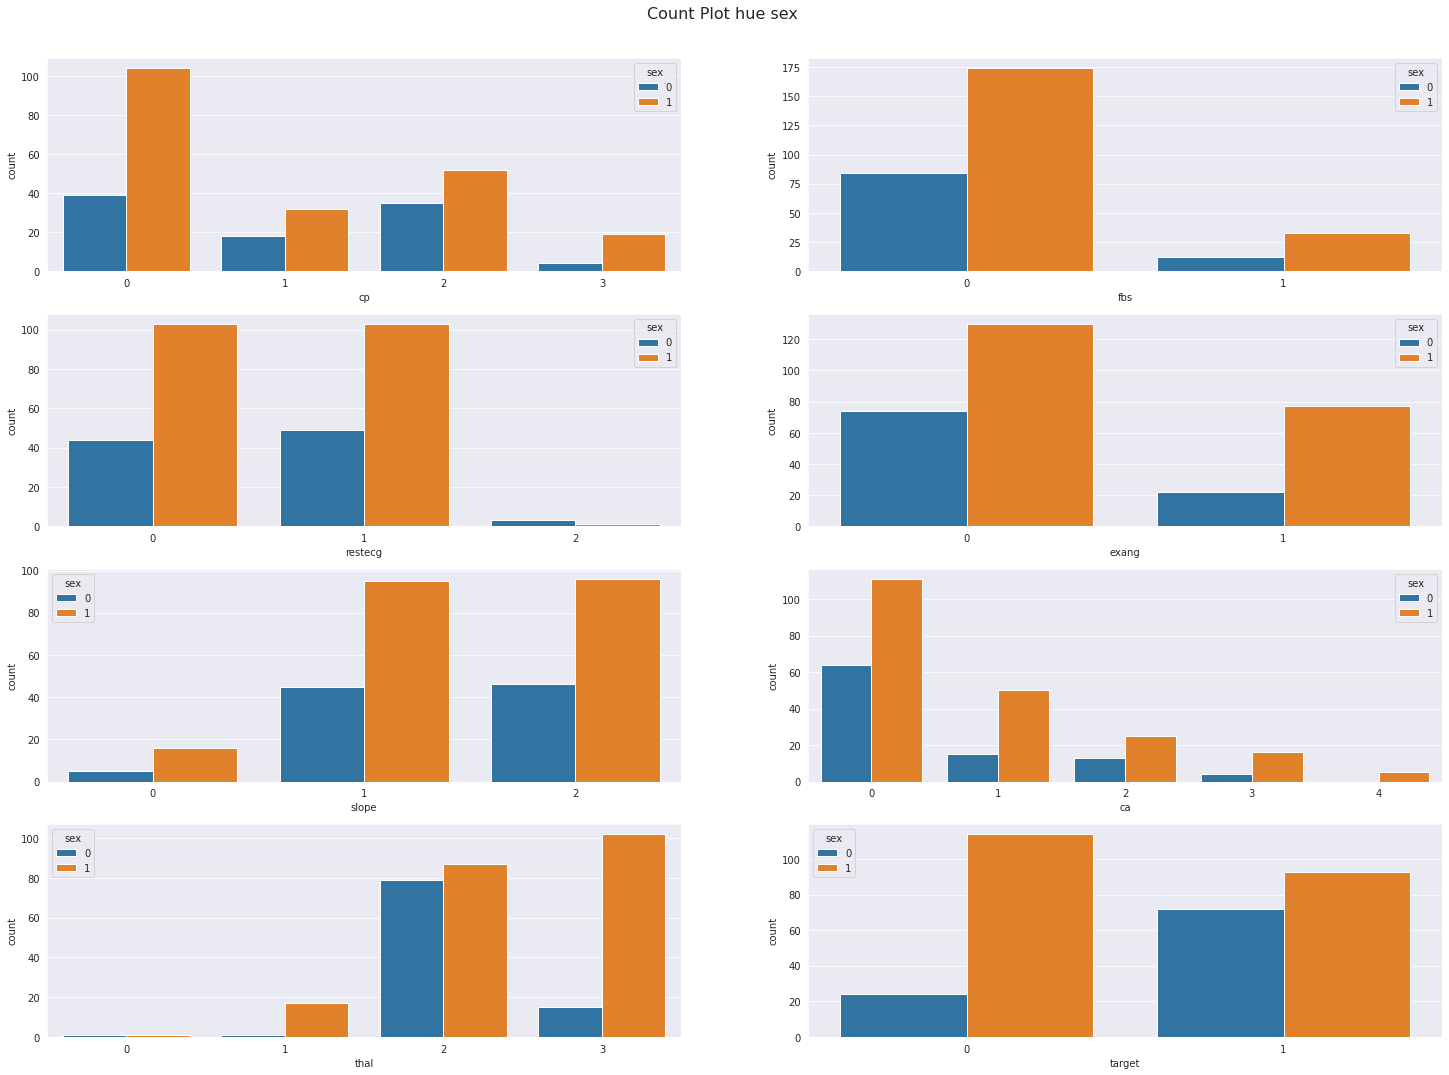

In [ ]:
count_hue_sex(data, cat_data)

In [ ]:
def count_hue_target(data, cat_data):
  fig, ax = plt.subplots(4,2,figsize=(25,18))
  ax = ax.flatten()
  cat_data_del_target=np.delete(cat_data, -1)
  fig.suptitle('Count Plot hue sex', fontsize=16, y=0.92)

  for index, col in enumerate(cat_data_del_target):
    graph=sns.countplot(x=data[col], ax=ax[index], hue=data[cat_data[-1]])

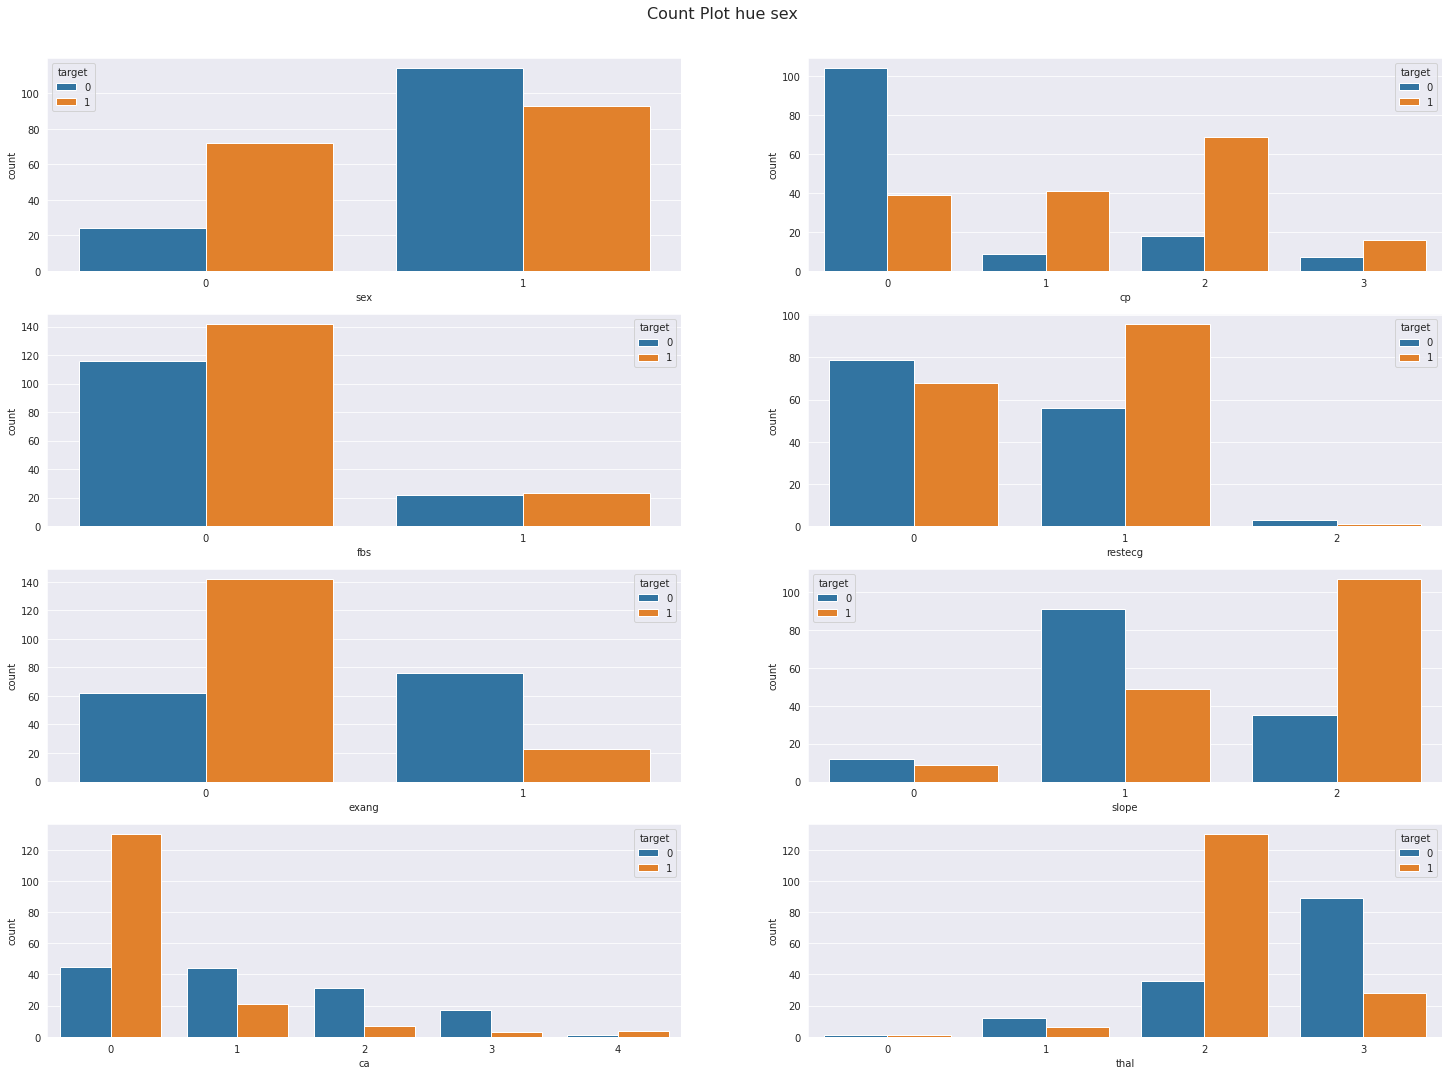

In [ ]:
count_hue_target(data, cat_data)

# 1. Checking the Distribution of the Data

In [ ]:
fig=plt.figure(figsize=(4,9))
fig=px.bar(x=['Disease', 'No disease'], 
        y=data['target'].value_counts().values)
fig.show()

<Figure size 288x648 with 0 Axes>

In [ ]:
percent=data['target'].value_counts().values/data.target.value_counts().values.sum(axis=0)*100
pd.DataFrame({
    'index': ['disease', 'No disease'],
    'percent values': percent
})

,index,percent values
0,disease,54.455446
1,No disease,45.544554


In [ ]:
num_data

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
def hist_plot(data, columns):
  fig, ax = plt.subplots(3, 5, figsize=(25,13))
  ax = ax.flatten()
  fig.suptitle('Hist Plot', fontsize=16, y=0.92)

  for index, col in enumerate(columns):
    graph=sns.histplot(x=data[col], ax=ax[index], kde=True)
  fig.delaxes(ax[-1])
  plt.show()

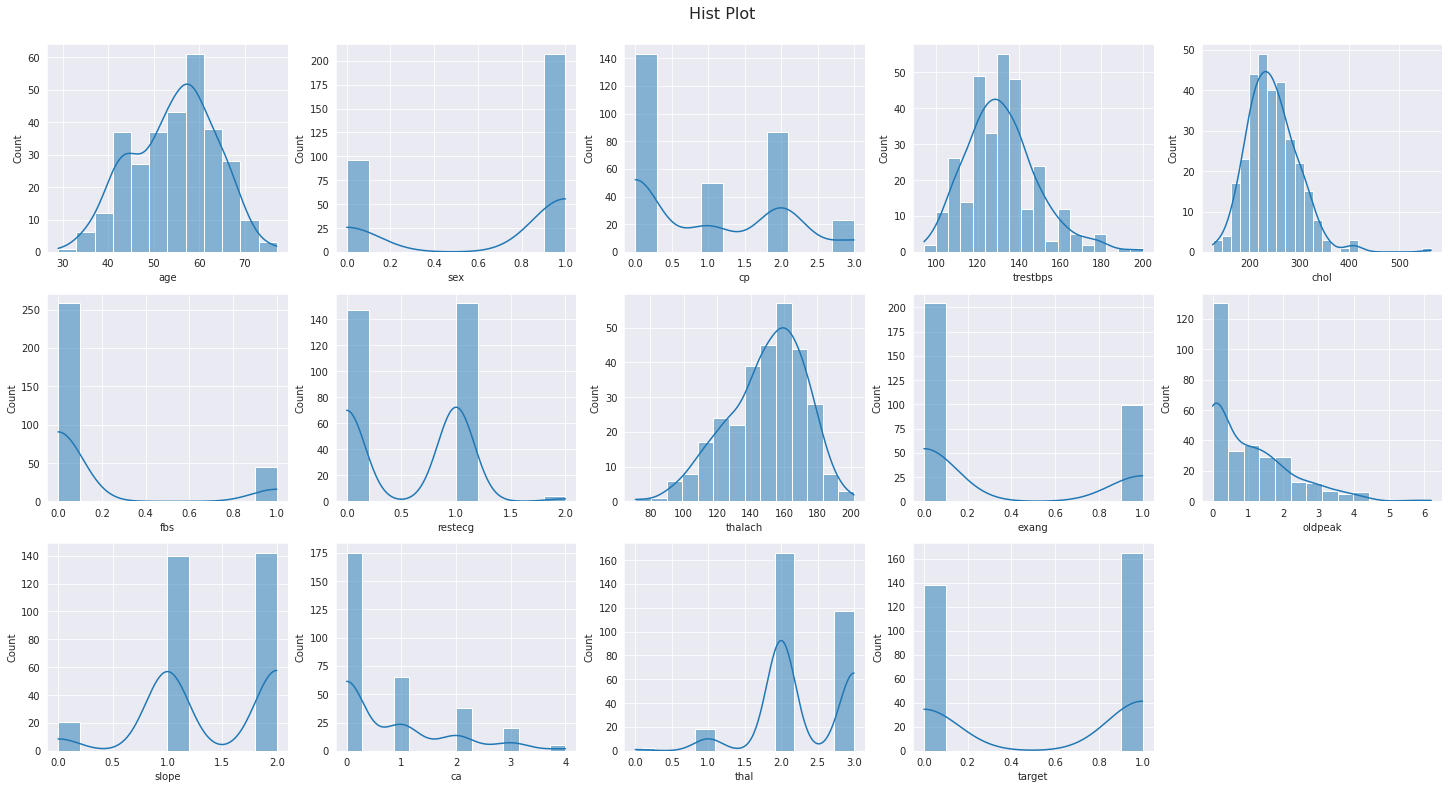

In [ ]:
hist_plot(data, data.columns)

In [ ]:
skew_col=['age', 'sex', ] 

In [ ]:
def box_plot(data, num_data):
  fig, ax = plt.subplots(2, 3, figsize=(25,13))
  ax = ax.flatten()
  fig.suptitle('Box Plot', fontsize=16, y=0.92)

  for index, col in enumerate(num_data):
    graph=sns.boxplot(y=data[col], ax=ax[index])
  fig.delaxes(ax[-1])
  plt.show()

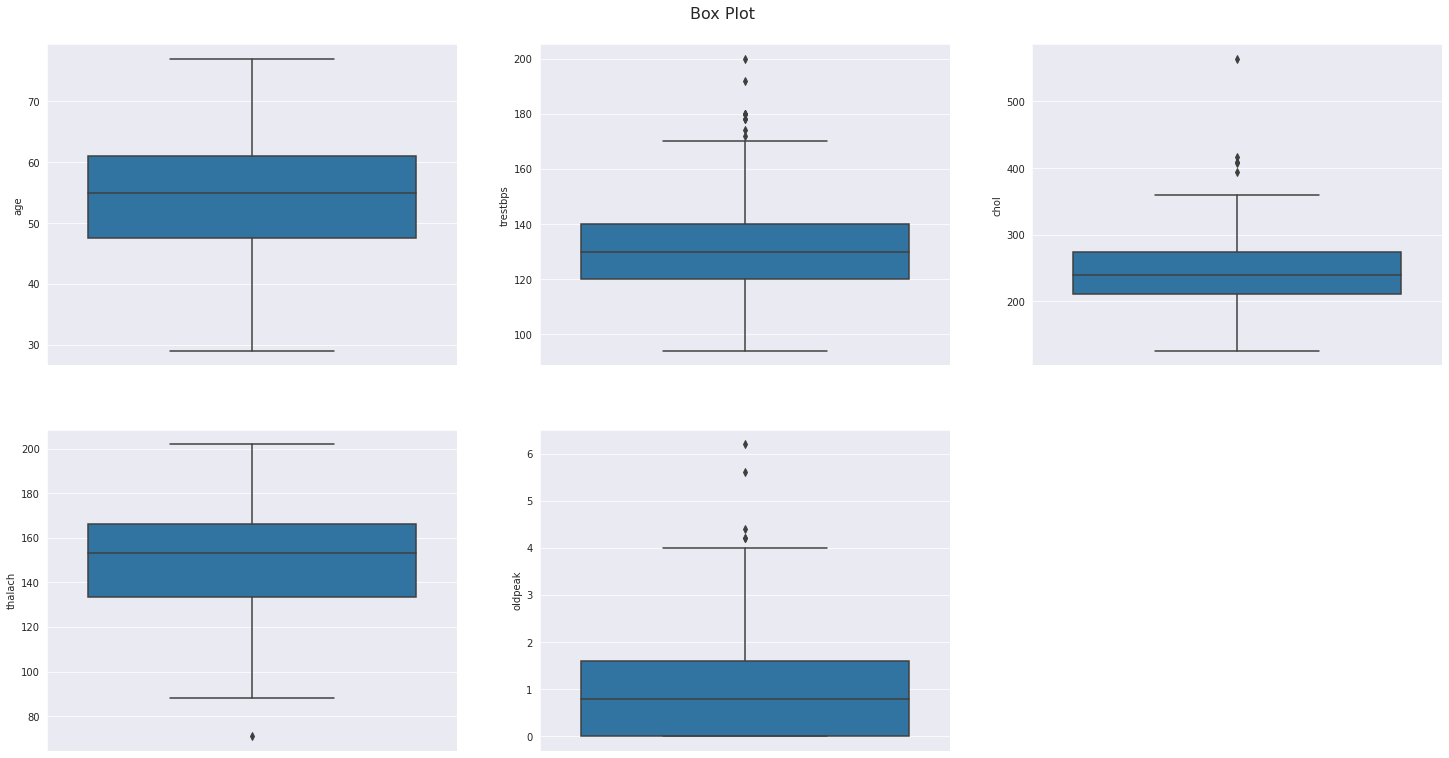

In [ ]:
box_plot(data, num_data)

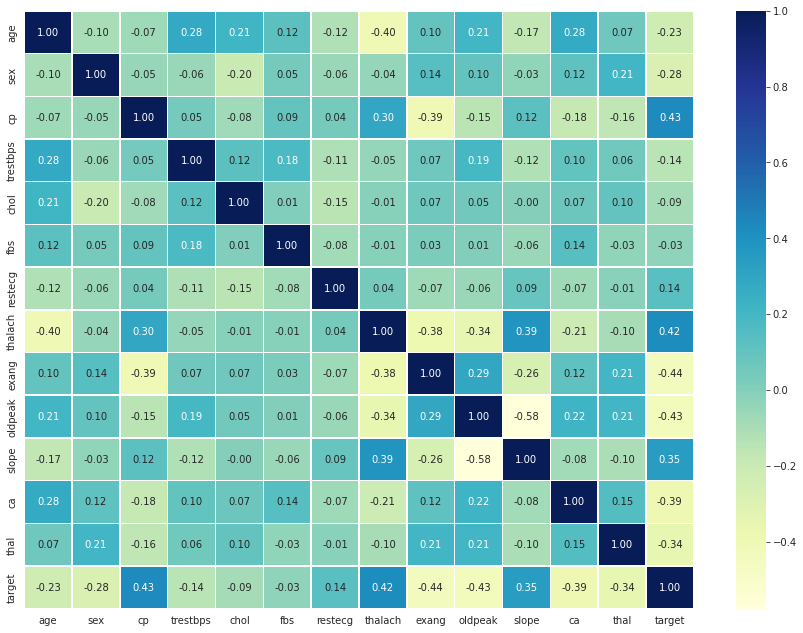

In [ ]:
corr_matrix=data.corr()

plt.figure(figsize=(15,11))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5,
            fmt='.2f', cmap='YlGnBu')

# machine learning classifiers 

In [ ]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#preprecessing model
from sklearn.preprocessing import Normalizer

#model evaluators
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn .metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, accuracy_score

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#train, test
x=data.drop('target', axis=1)
y=data.target

In [ ]:
x.shape, y.shape

((303, 13), (303,))

In [ ]:
for column in x.columns:
  print(f'{column}: {np.std(x[column])}')
column=x.columns
print(column)

age: 9.067101638577872
sex: 0.46524119304834577
cp: 1.0303480250839463
trestbps: 17.509178065734393
chol: 51.74515101045713
fbs: 0.3556096038825341
restecg: 0.5249911240963214
thalach: 22.86733258188924
exang: 0.46901858543869346
oldpeak: 1.1591574732421364
slope: 0.6152084301256651
ca: 1.0209175011165652
thal: 0.6112653149988239
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


normalization là một phương pháp hữu ích khi dữ liệu của bạn không theo phân phối Gaussian. 

Normalization thay đổi các giá trị của dữ liệu với mục đích chính để thu được 1 phân phối dữ liệu tốt hơn cho các thuật toán học máy.

In [ ]:
#scaler
scaler=Normalizer()
x[column]=scaler.fit_transform(x[column])
x.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.169931,0.002176,0.003027,0.410753,0.753559,0.000458,0.001686,0.467172,0.001029,0.003266,0.004371,0.002267,0.007238
std,0.033444,0.001514,0.003274,0.061778,0.067928,0.001109,0.001700,0.081560,0.001498,0.003711,0.001981,0.003223,0.002126
min,0.091628,0.000000,0.000000,0.191288,0.470966,0.000000,0.000000,0.250855,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.143385,0.000000,0.000000,0.368876,0.711591,0.000000,0.000000,0.414606,0.000000,0.000000,0.003075,0.000000,0.005897
50%,0.169823,0.002980,0.002746,0.404534,0.754881,0.000000,0.002481,0.470129,0.000000,0.002285,0.003804,0.000000,0.006818
75%,0.191402,0.003259,0.006118,0.454920,0.803298,0.000000,0.003227,0.525668,0.002833,0.005224,0.006147,0.003440,0.009061
max,0.301597,0.004448,0.010708,0.622258,0.938143,0.004120,0.007177,0.691120,0.004448,0.022282,0.008573,0.014048,0.013343


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, 
test_size=0.2, random_state=42)

In [ ]:
for column in x.columns:
  print(f'{column}: {np.std(x[column])}')
column=x.columns
print(column)

age: 0.03338856372440753
sex: 0.0015113736851139132
cp: 0.003269068075145797
trestbps: 0.061675860417896966
chol: 0.06781628733838407
fbs: 0.0011068424892421373
restecg: 0.0016971280468815058
thalach: 0.08142494340738274
exang: 0.001495682747221695
oldpeak: 0.003705137554933901
slope: 0.001978087450033974
ca: 0.0032174164360039893
thal: 0.0021223822312406468
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


Cross validation là một phương pháp thống kê được sử dụng để ước lượng hiệu quả của các mô hình học máy. Nó thường được sử dụng để so sánh và chọn ra mô hình tốt nhất cho một bài toán. Kỹ thuật này dễ hiểu, dễ thực hiện và cho ra các ước lượng tin cậy hơn so với các phương pháp khác

In [ ]:
from pandas.core.common import random_state
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}
results=[]
for name, model in models.items():
  kf=KFold(n_splits=5, random_state=42, shuffle=True)
  cv_results=cross_val_score(model, x, y, 
                             cv=kf, scoring='accuracy')
  
  
  results.append(cv_results)

In [ ]:
score_df=pd.DataFrame(dict(
    KNN=results[0], Logistics=results[1], Random=results[2]
)).melt(var_name='name_model')
px.bar(score_df, x='name_model', y='value')

#Hyperparameter Tuning¶


In [ ]:
##KNN

train_scores=[]
test_scores=[]
neighbors=range(1,21)

for neighbor in neighbors:
  knn=KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(x_train, y_train)

  train_scores.append(knn.score(x_train, y_train))
  test_scores.append(knn.score(x_test, y_test))

max train score for KNN is: 77.05%


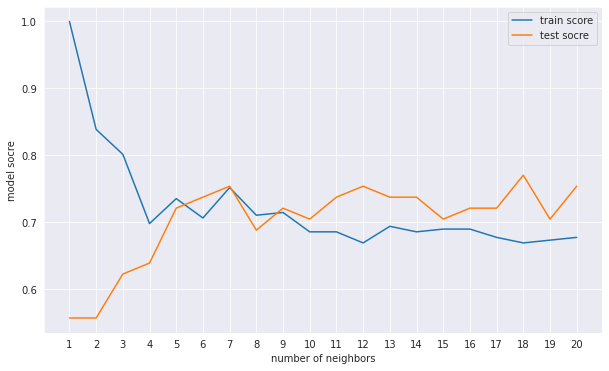

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, train_scores, label='train score')
plt.plot(neighbors, test_scores, label='test socre')
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('model socre')
print(f'max train score for KNN is: {round(max(test_scores)*100, 2)}%')

In [ ]:
max_test_score=max(test_scores)
test_scores_ind=[index for index, value in enumerate(test_scores) if value==max_test_score]
print('max test socre {} % and k = {}'.format(
    round(max_test_score*100, 2), list(map(lambda x: x+1, test_scores_ind))
))

max test socre 77.05 % and k = [18]


              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

0.7868852459016393


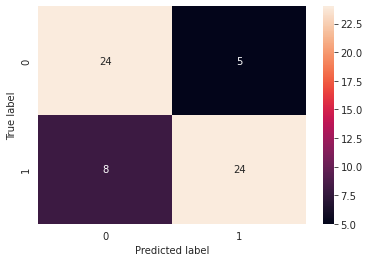

In [ ]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_test, y_test)
y_pred_knn=knn.predict(x_test)
conf_mat=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

#Tuning using RandomizedSearchCV¶


In [ ]:
def randomSCV(model, x_train, y_train, param_grid):
  kf=KFold(n_splits=5, shuffle=True, random_state=42)
  result_RSCV=RandomizedSearchCV(model, 
  param_distributions=param_grid, cv=kf, n_iter=20, verbose=True)
  result_RSCV.fit(x_train, y_train)

  print(f'best score: {result_RSCV.best_score_}')
  print(f'best paramaters {result_RSCV.best_params_}')


In [ ]:
##logistics
log_reg_grid={'C': np.logspace(-4,4,20), 'solver': ['liblinear']}
randomSCV(LogisticRegression(), x_train, y_train, log_reg_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
best score: 0.8141156462585034
best paramaters {'solver': 'liblinear', 'C': 10000.0}


In [ ]:
# tuning random forest classifier
rf_grid = {'n_estimators':[10,150,300],
            'max_depth':[30,60,90,None]}
randomSCV(RandomForestClassifier(), x_train, y_train, rf_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.



best score: 0.8142006802721088
best paramaters {'n_estimators': 300, 'max_depth': None}


#Tuning using GridSearchCV¶


In [ ]:
def gridSCV(model, x_train, x_test, y_train, y_test, param_grid):
  kf=KFold(n_splits=5, shuffle=True, random_state=42)
  result_GSCV=GridSearchCV(model, 
  param_grid=param_grid, cv=kf, verbose=True)
  result_GSCV.fit(x_train, y_train)

  print(f'best score: {result_GSCV.best_score_}')
  print(f'best paramaters {result_GSCV.best_params_}')
  
  #predict
  y_pred=result_GSCV.predict(x_test)
  conf_mat=confusion_matrix(y_test, y_pred)
  sns.heatmap(conf_mat, annot=True)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  print(classification_report(y_test, y_pred))
  print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
best score: 0.8141156462585034
best paramaters {'C': 10000.0, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8852459016393442


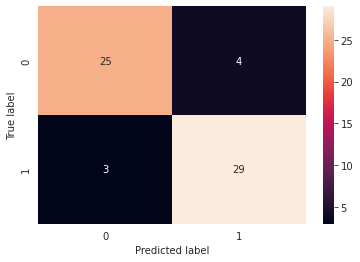

In [ ]:
##logistics
log_reg_grid={'C': np.logspace(-4,4,30), 'solver': ['liblinear']}
gridSCV(LogisticRegression(), x_train, x_test, y_train, y_test, log_reg_grid)

In [ ]:
model_log=LogisticRegression(C=10000.0, solver='liblinear')
model_log.fit(x_train, y_train)
y_pred_log=model_log.predict(x_test)
df_model_log=pd.DataFrame({
    'y_true': y_test, 'y_pred': y_pred_log
})
df_model_log.head(10)

,y_true,y_pred
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
9,1,1
119,1,1
223,0,0
268,0,0
33,1,1


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
model_log.predict([np.array(x_test.loc[60])])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([1])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
best score: 0.8346088435374149
best paramaters {'max_depth': 90, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

0.8524590163934426


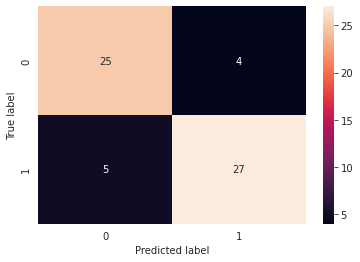

In [ ]:
# tuning random forest classifier
rf_grid = {'n_estimators':[10,150,300],
            'max_depth':[30,60,90,None]}
gridSCV(RandomForestClassifier(), x_train, x_test, y_train, y_test, rf_grid)